This notebook accesses the tessellation and shows how to add/remove adjacency links between cells.

In [1]:
# step 1. initialize

%matplotlib inline
import os.path
from tramway.helper import *

## script main parameters ##

trajectory_file = 'glycine_receptor.trxyt'
tessellation_method = 'kmeans'
# average number of locations per cell
location_count = 500
# minimum number of locations per cell
min_location_count = 50
# figure size
figsize = (16,12)

############################

rwa_file = os.path.splitext(trajectory_file)[0]+'.rwa'
segmentation_label = '{}_{:d}_min_{:d}'.format(tessellation_method, location_count, min_location_count)


In [2]:
# step 2. tessellate

_ = tessellate(rwa_file if os.path.exists(rwa_file) else trajectory_file,
               tessellation_method,
               avg_location_count=location_count, min_n=min_location_count,
               output_file=rwa_file, output_label=segmentation_label)


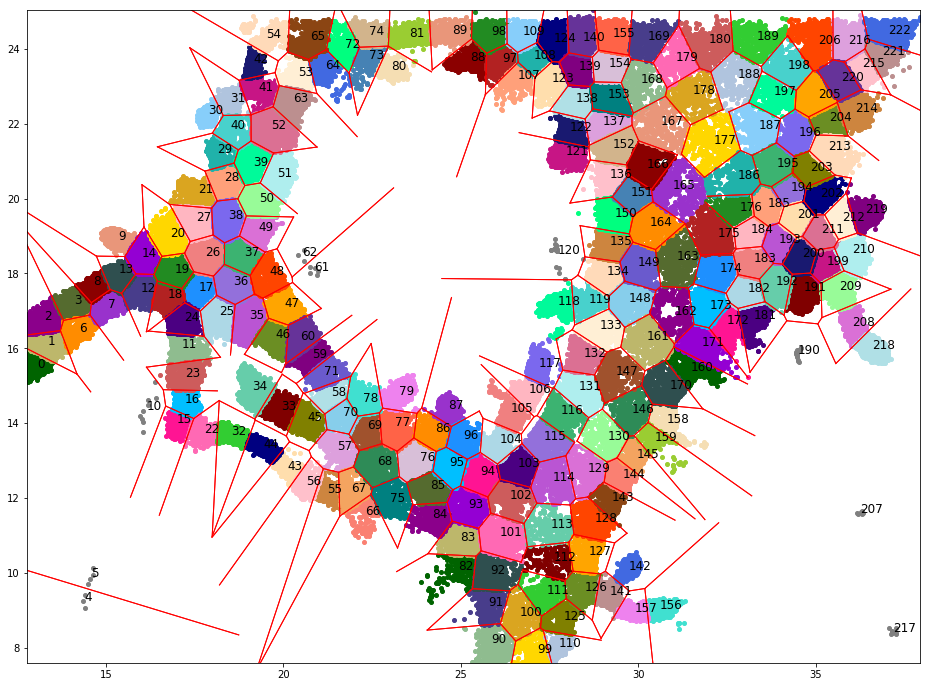

In [4]:
# step 3. plot the mesh

cell_plot(rwa_file, label=segmentation_label, cell_indices=True, figsize=figsize)

# notes: grey points pertain to cells that will be ignored in the inference;
#        red edges denote adjacency;
#        some edges at the border may miss in the figure because of their open end (not a defined point)

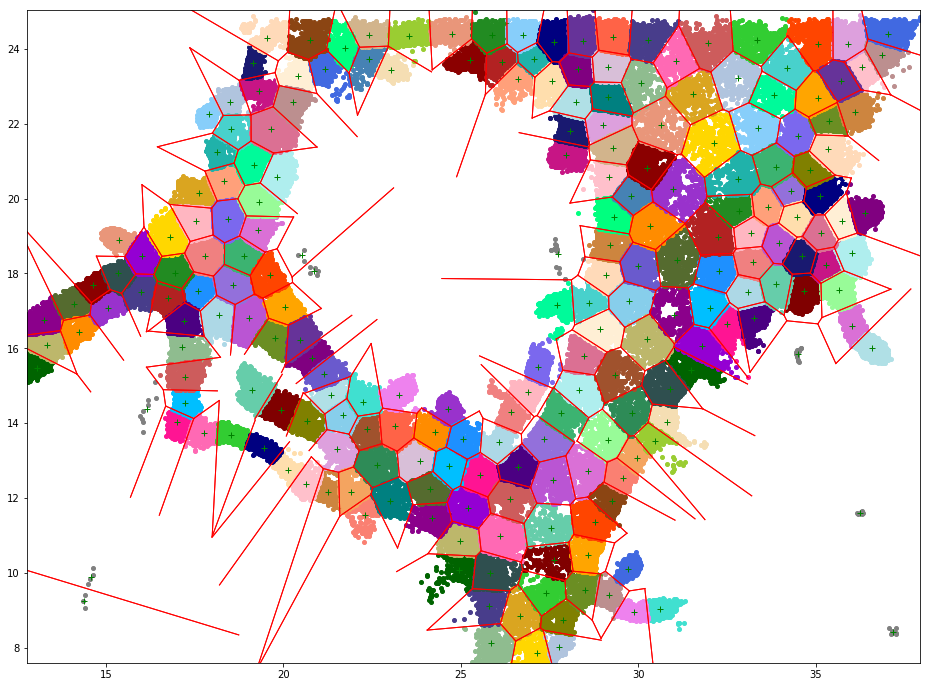

In [6]:
# step 4. edit the mesh

# load the mesh
analysis_tree = load_rwa(rwa_file)
mesh = analysis_tree[segmentation_label].data.tessellation
adjacency = mesh.adjacency_label

# no helper yet; let us get our hands dirty
_edge_index = mesh.cell_adjacency
def edge_index(i, j):
    '''protects against implicit zeros in CSR sparse matrices.'''
    js = _edge_index.indices[_edge_index.indptr[i]:_edge_index.indptr[i+1]]
    if j not in js:
        raise IndexError('undefined edge')
    return _edge_index[i, j]

# connect some cells
adjacency[edge_index( 92, 112)] = True
adjacency[edge_index(165, 167)] = True
adjacency[edge_index(165, 175)] = True
adjacency[edge_index(165, 176)] = True
adjacency[edge_index(165, 186)] = True
adjacency[edge_index(177, 188)] = True

# disconnect some other cells
adjacency[edge_index(8, 9)] = False
adjacency[edge_index(32, 33)] = False
adjacency[edge_index(32, 34)] = False
adjacency[edge_index(33, 44)] = False
adjacency[edge_index(33, 59)] = False
adjacency[edge_index(33, 71)] = False
adjacency[edge_index(34, 46)] = False
adjacency[edge_index(43, 45)] = False
adjacency[edge_index(43, 57)] = False
adjacency[edge_index(44, 45)] = False
adjacency[edge_index(79, 87)] = False
adjacency[edge_index(142, 156)] = False
# ...

# save and plot
mesh.adjacency_label = adjacency
save_rwa(rwa_file, analysis_tree, force=True)
cell_plot(analysis_tree, label=segmentation_label, figsize=figsize)
